<a href="https://colab.research.google.com/github/vikadenisova/mirea_ml/blob/main/lab51_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
from itertools import product
import random

# В данной части лабораторной работе предлагается кластеризовать данные с помощью алгоритма k-средних.
# В качестве данных предлагается картинка в формате RGB. Необходимо кластеризовать пиксели по цветам, усреднить цвет в
# полученных кластерах и снизить в итоге количество цветов, используемых для отображения картинки.

# Для выполнения данной работы необходимо заполнить код в следующих функциях:
# 1. init_centroids - расчет начальных положений центроидов
# 2. find_closest_centroid - нахождение ближайшего центроида
# 3. compute_cluster_center - расчет центра кластера
# 4. kmeans - реализация алгоритма k-средних

In [ ]:
def init_centroids(data, k):

    # Функция для расчета начальных положений центроидов.
    # Принимает data - список кортежей - точек в пространстве признаков,
    # k - желаемое число кластеров (и центроидов, соответственно).
    # Должна вернуть список начальных положений центроидов. Предлагается выбрать случайно k объектов из data и
    # поставить в их положения центроиды.
    result = []
    indexes_of_centroids = [random.randint(0, len(data) - 1) for _ in range(1, k+1)]
    for index in indexes_of_centroids:
        result.append(data[index])  # список положений (кортежей) центроидов, нужно заполнить.

    # =============
    return result

In [ ]:
def find_closest_centroid(value, centroids):

    # Функция для нахождения ближайшего центроида к заданной точке в пространстве признаков.
    # Принимает value - точка (кортеж) в пространстве признаков, centroids - список кортежей положений центроидов.
    # Должна вернуть индекс ближайшего центроида в списке centroids.

    dists = []
    for centroid in range(len(centroids)):
        dist = 0
        for i in range(len(value)):
            dist += (centroids[centroid][i] - value[i]) ** 2
        dists.append(dist ** 1/2)




    closest_index = dists.index(min(dists))  # индекс ближайшего центроида из списка центроидов, нужно посчитать.
    return closest_index

In [ ]:
def compute_cluster_center(cluster_data):

    # Функция для расчета центра кластера. Принимает на вход cluster_data - список кортежей точек в
    # пространстве признаков, соответствующих данным из выборки.
    # Должна вернуть кортеж - центр кластера.
    result = []

    for i in range(len(cluster_data[0])):
        sum_of_coordinate = 0
        for j in range(len(cluster_data)):
            sum_of_coordinate += cluster_data[j][i]
        result.append(sum_of_coordinate / len(cluster_data))
    return tuple(round(r) for r in result)

In [ ]:
def kmeans(data, k):

    # Функция, реализующая алгоритм k-средних.
    # Принимает на вход data - список положений (кортежей) точек в пространстве признаков (по сути, данные),
    # k - число желаемых кластеров в итоге.
    # Должна вернуть список клстеров (списков) положений (кортежей), содержащих все точки, принадлежащие всем кластерам,
    # и список положений (кортежей) центроидов соответствующих кластеров.

    centroids = init_centroids(data, k)  # список положений центроидов, его нужно посчитать
    while True:

        clusters = [list() for _ in centroids]  # список списков положений точек для всех центроидов
        for value in data:
            cent_index = find_closest_centroid(value, centroids)
            clusters[cent_index].append(value)
        # Необходимо написать код, который будет вычислять центры кластеров (фукнцию вы уже реализовали),
        # затем переносить соответствующие центроиды в эти центры. Выход из цикла должен происходить тогда, когда новый
        # расчет центра совпал с текущим положением центроида для всех центроидов.
        flag = 0
        for cluster in range(len(clusters)):
            center = compute_cluster_center(clusters[cluster])
            if centroids[cluster] == center:
                flag += 1
            else:
                centroids[cluster] = center

        if flag == len(clusters):
            break

        # =============

    return clusters, centroids

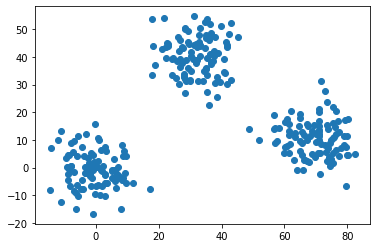

Положения центроидов для модельного случая (должны быть близки к [(0, 0), (70, 10), (30, 40)] с точностью до порядка): [(69, 11), (-1, -1), (32, 41)]


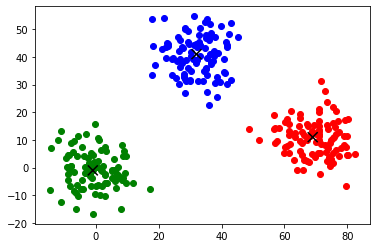


Загруза картинки из файла "image.png".

Запуск алгоритма k-средних (может занять время..)
Сокращение количества цветов на картинке.
Успех! Результат в файле "result.png" (обратите внимаение на размер результата в килобайтах).


In [ ]:
model_centers = [(0, 0), (70, 10), (30, 40)]
model_data = [(random.gauss(c[0], 7), random.gauss(c[1], 7)) for c in model_centers for _ in range(100)]

plt.scatter(*[list(map(lambda x: x[i], model_data)) for i in range(2)], marker='o')
plt.show()

model_clusts, model_centrs = kmeans(model_data, 3)
print(f'Положения центроидов для модельного случая (должны быть близки к {model_centers} с точностью до порядка): '
      f'{model_centrs}')

for i in range(len(model_clusts)):
    plt.scatter(*[list(map(lambda x: x[j], model_clusts[i])) for j in range(2)],
                marker='o',
                c=('r', 'g', 'b')[i])
plt.scatter(*[list(map(lambda x: x[j], model_centrs)) for j in range(2)],
            marker='x',
            c='black', s=[100] * len(model_clusts))
plt.show()

print()
print('Загруза картинки из файла "image.png".')
image = Image.open('image.png')
image_pixels = image.load()
data = [image_pixels[x, y] for x, y in product(range(image.size[0]), range(image.size[1]))]

# количество цветов, которе остается на результирующей картинке (можно поварьировать,
# но от него сильно зависит время выполнения)
clusters_num = 8

print()
print('Запуск алгоритма k-средних (может занять время..)')
clusts, centrs = kmeans(data, clusters_num)


print('Сокращение количества цветов на картинке.')
for x, y in product(range(image.size[0]), range(image.size[1])):
    for i in range(len(clusts)):
        if image_pixels[x, y] in clusts[i]:
            image_pixels[x, y] = centrs[i]
            break
image.save('result.png')

print('Успех! Результат в файле "result.png" (обратите внимаение на размер результата в килобайтах).')